# Data Imbalance

## Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Predict whether a customer will pay back a loan or not?

Pay = 500;
Do not pay = 20

In [2]:
df = pd.read_csv('datasets/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
def missing_values_df(data):
    null_values = data.isna().sum().sort_values(ascending=False)
    percentage_of_null_values = data.isna().mean().sort_values(ascending=False)*100
    missing_values = pd.DataFrame({"Null_values":null_values,
                                   "pct_of_null_values":percentage_of_null_values})
    null_counts = df.isna().mean().sort_values(ascending=False)
    plt.figure(figsize=(16,8))
    plt.xticks(np.arange(len(null_counts)), null_counts.index,rotation='vertical')
    plt.ylabel('Fraction of rows with missing data')
    plt.bar(np.arange(len(null_counts)),null_counts)
    plt.show()
    return missing_values

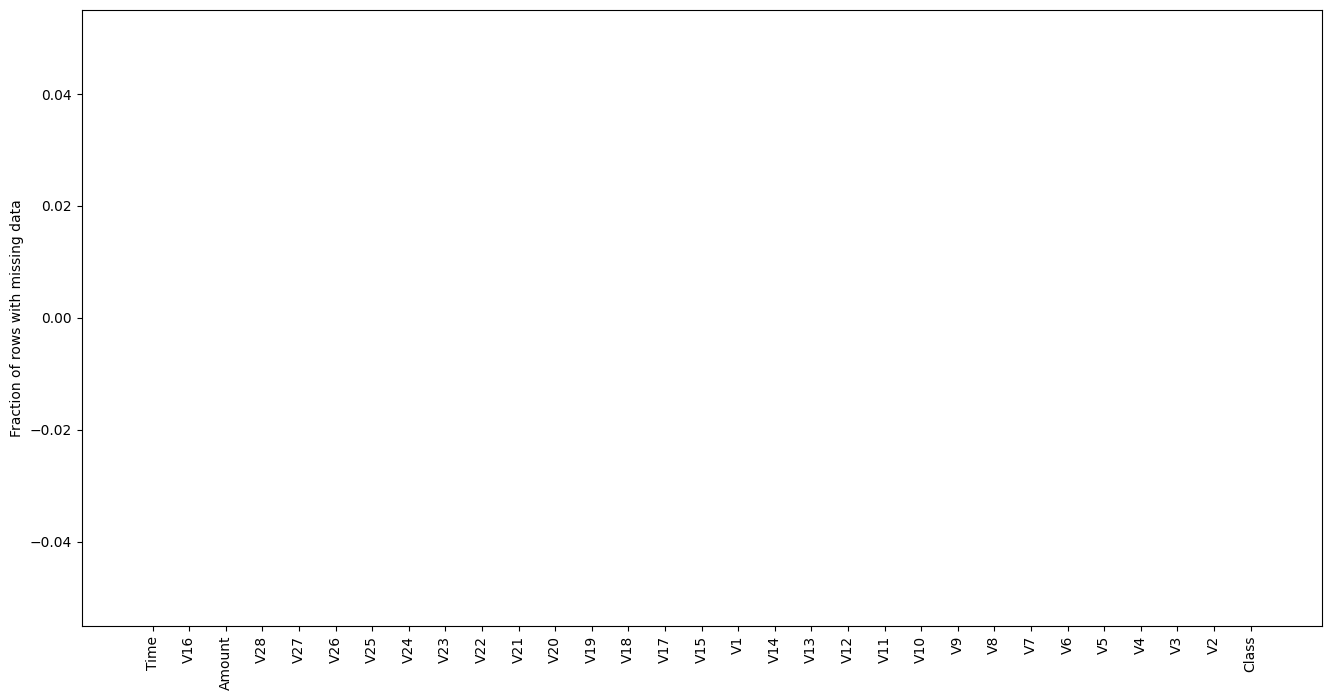

,Null_values,pct_of_null_values
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


In [5]:
missing_values_df(df)

**Insights:**
No Missing values in the dataset

In [7]:
df.shape[0]

284807

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
def unique_values(df, variable, unique=10):
    if df[variable].nunique() <= unique:
        values = df[variable].value_counts()
        pct = df[variable].value_counts(normalize=True)*100

        df_value_counts = pd.DataFrame({'value_counts':values,
                                        'Percentage':pct})
        print(f'Column Name: {variable}')
        return df_value_counts
    else:
        return f'There are more than {unique} Unique values in this column'

In [11]:
unique_values(df, 'Class')

Column Name: Class


,value_counts,Percentage
0,284315,99.827251
1,492,0.172749


In [12]:
fraud = len(df[df['Class']==1])
not_fraud = len(df[df['Class']==0])

In [13]:
labels = 'Fraud','Not Fraud'
sizes = [fraud,not_fraud]

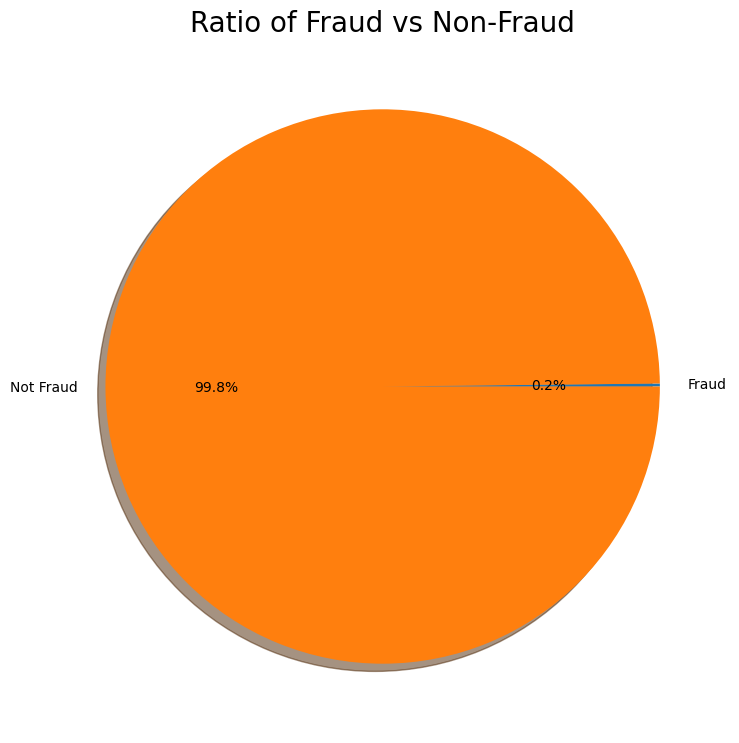

In [14]:
plt.figure(figsize=(10,9))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud vs Non-Fraud', fontsize=20)
sns.set_context('paper', font_scale=2)

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score,\
                confusion_matrix, recall_score, ConfusionMatrixDisplay

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=50)

In [17]:
dummy_classifier = DummyClassifier(strategy='most_frequent')

In [18]:
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [19]:
dummy_predict = dummy_classifier.predict(X_test)

In [20]:
accuracy_score(y_test, dummy_predict)*100

99.84129659279233

In [21]:
confusion_matrix(y_test, dummy_predict)

array([[71089,     0],
       [  113,     0]], dtype=int64)

Dummy Classifier is like a 2000's bollywood movie director.
You really liked that film when it's released, and year's later you found out 
it's a scene by scene copy of some hollywood movie.

In [22]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [23]:
logistic_predict = logistic.predict(X_test)

In [24]:
logistic_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(y_test,logistic_predict)

0.9991432824920649

## Dealing with ***Imbalance Data***

There are several methods that we can use to deal with **Imbalance Data**

We will take a look at some of the popular ones

### Adding More Data

If the data is imbalanced, try to collect samples of that class which has lower percentage of overall representation.

### Use wide variety of  Performance Metrics

Accuracy is not the ultimate performance metrics and particularly in case of imbalanced data, it fails to be appropriate.

Trying different performance metrics can provide more insights into the performance of the model.

**1. Confusion Matrix**: A matrix showing correct predictions and the types of incorrect predictions made

**2. Precision**: A measure of exactness of classifiers

**3. Recall**: A measure of completeness of classifiers

**4. F1 Score**: Harmonic mean of precision and recall

In [26]:
pd.DataFrame(confusion_matrix(y_test, logistic_predict))

,0,1
0,71064,25
1,36,77


In [27]:
cm = confusion_matrix(y_test, logistic_predict)
cm

array([[71064,    25],
       [   36,    77]], dtype=int64)

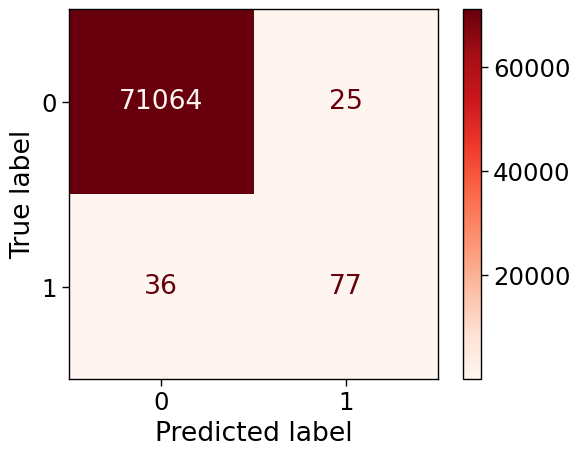

In [28]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Reds')

In [29]:
f1_score(y_test, logistic_predict)

0.7162790697674417

In [30]:
recall_score(y_test, logistic_predict)

0.6814159292035398

### Change the algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
random_forest_predict = rfc.predict(X_test)

In [36]:
accuracy_score(y_test, random_forest_predict)

0.999522485323446

In [37]:
confusion_matrix(y_test,random_forest_predict)

array([[71081,     8],
       [   26,    87]], dtype=int64)

In [38]:
pd.DataFrame(confusion_matrix(y_test,random_forest_predict))

,0,1
0,71081,8
1,26,87


### Resampling Techniques

- Upsampling/Oversampling
- Downsampling/ Undersampling

In [39]:
from sklearn.utils import resample

In [128]:
not_fraud = df[df.Class==0]

In [129]:
fraud = df[df.Class==1]

In [130]:
fraud_data_upsampled = resample(fraud, 
                                replace=True, 
                                n_samples = len(not_fraud), 
                                random_state=27)

In [131]:
upsampled = pd.concat([not_fraud, fraud_data_upsampled])

In [132]:
unique_values(upsampled, 'Class')

Column Name: Class


,value_counts,Percentage
0,284315,50.0
1,284315,50.0


In [133]:
# !pip install imbalanced-learn

In [55]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
rand_over = RandomOverSampler(random_state=50)
X_res, y_res = rand_over.fit_resample(X,y)

In [57]:
print(Counter(y))
print(Counter(y_res))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


### ML on Balanced Dataset

#### Logistic Regression

In [137]:
X = upsampled.iloc[:,:-1]
y = upsampled.iloc[:,-1]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=50)

In [85]:
Log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [86]:
Log_reg

LogisticRegression(solver='liblinear')

In [87]:
log_predict = Log_reg.predict(X_test)

In [88]:
accuracy_score(y_test, log_predict)

0.9378578764473332

In [89]:
confusion_matrix(y_test, log_predict)

array([[69399,  1865],
       [ 6969, 63925]], dtype=int64)

In [90]:
f1_score(y_test, log_predict)

0.935369172690293

In [91]:
recall_score(y_test, log_predict)

0.9016983101531865

#### Random Forest

In [92]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train,y_train)
random_forest_predict = rfc.predict(X_test)

In [93]:
accuracy_score(y_test, random_forest_predict)

0.9999788967205504

In [94]:
confusion_matrix(y_test,random_forest_predict)

array([[71261,     3],
       [    0, 70894]], dtype=int64)

In [95]:
f1_score(y_test, random_forest_predict)

0.9999788420985817

In [96]:
recall_score(y_test, random_forest_predict)

1.0

### Downsampling

In [105]:
not_fraud_data_downsampled = resample(not_fraud, 
                                replace=False, 
                                n_samples = len(fraud), 
                                random_state=27)

In [106]:
not_fraud_data_downsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162213,114934.0,1.995938,0.041506,-1.626617,0.359730,0.328712,-0.670507,0.070409,-0.077927,0.290942,...,-0.298886,-0.842195,0.345810,0.657588,-0.333355,0.142894,-0.071543,-0.037694,13.48,0
75678,56197.0,0.945842,-0.400033,-0.554717,1.778090,1.832547,4.439277,-0.716450,1.068586,0.011658,...,-0.111339,-0.472340,-0.201955,1.025456,0.688154,0.063892,0.006502,0.038923,127.78,0
279712,169046.0,1.735539,-0.483406,-0.845973,1.402665,0.185065,0.613135,-0.052874,0.017813,0.987641,...,-0.476199,-1.326599,0.262618,-0.016740,-0.221760,-1.111037,0.036587,-0.005262,137.48,0
88272,62068.0,1.253755,-0.657127,0.411747,-1.468090,-0.877031,-0.330262,-0.597605,-0.011242,1.955442,...,-0.055549,-0.003120,-0.182191,-0.550678,0.489173,0.029340,0.037419,0.024202,48.40,0
231933,146985.0,0.242337,0.805488,-0.118981,0.734465,1.330932,-1.084600,1.476898,-0.574761,-0.408175,...,0.126925,0.720698,-0.202297,0.005675,-0.187671,-0.574096,-0.031813,-0.121123,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102043,68032.0,-1.267253,1.815509,0.462275,0.091032,-0.596431,-1.094155,0.028623,0.757142,-0.622535,...,-0.205672,-0.691691,0.086013,0.340113,-0.044541,0.079862,0.115401,0.021780,10.02,0
120826,75974.0,1.374184,-0.954054,0.280265,-1.507286,-1.074885,-0.365597,-0.730120,-0.081545,-2.477872,...,-0.534463,-1.272519,0.265648,-0.048425,0.003267,-0.635907,0.030017,0.019229,49.00,0
34876,37864.0,-3.968394,-4.439733,-0.359330,-0.437723,3.108932,-2.899075,-2.499521,0.997295,1.825611,...,0.389388,-0.481852,-0.177248,-0.885987,0.118788,-0.775893,0.272131,-0.759416,15.00,0
159626,112738.0,-2.461729,2.891215,-2.422770,-1.533162,0.346870,-1.182219,0.683252,0.853793,0.177228,...,0.137672,0.947023,-0.040349,0.740068,0.002104,-0.011041,0.030379,-0.284215,3.66,0


In [107]:
downsampled = pd.concat([not_fraud_data_downsampled,fraud])

In [109]:
unique_values(downsampled, 'Class')

Column Name: Class


,value_counts,Percentage
0,492,50.0
1,492,50.0


In [110]:
X = downsampled.iloc[:,:-1]
y = downsampled.iloc[:,-1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=50)

#### Logistic Regression

In [112]:
Log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
Log_reg

LogisticRegression(solver='liblinear')

In [113]:
log_predict = Log_reg.predict(X_test)

In [114]:
accuracy_score(y_test, log_predict)

0.9390243902439024

In [115]:
confusion_matrix(y_test, log_predict)

array([[118,   0],
       [ 15, 113]], dtype=int64)

In [116]:
f1_score(y_test, log_predict)

0.9377593360995851

In [117]:
recall_score(y_test, log_predict)

0.8828125

#### Random Forest

In [118]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train,y_train)
random_forest_predict = rfc.predict(X_test)

In [119]:
accuracy_score(y_test, random_forest_predict)

0.9186991869918699

In [120]:
confusion_matrix(y_test,random_forest_predict)

array([[114,   4],
       [ 16, 112]], dtype=int64)

In [121]:
f1_score(y_test, random_forest_predict)

0.9180327868852458

In [122]:
recall_score(y_test, random_forest_predict)

0.875

## SMOTE 

Synthetic Minority Oversampling Technique

In [124]:
# !pip install SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
y.sample(5)

274910    0
182967    0
272280    0
212390    0
215013    0
Name: Class, dtype: int64

In [25]:
sm = SMOTE(random_state=27)

In [28]:
X_train,y_train = sm.fit_resample(X_train, y_train)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smote.predict(X_test)
accuracy_score(y_test, smote_pred)

0.9841437038285441

In [32]:
confusion_matrix(y_test, smote_pred)

array([[69975,  1114],
       [   15,    98]], dtype=int64)

In [33]:
recall_score(y_test, smote_pred)

0.8672566371681416

In [34]:
f1_score(y_test, smote_pred)

0.1479245283018868